
# BMIS-2542: Data Programming Essentials with Python 
##### Katz Graduate School of Business, Spring 2021

## Session 9: Decision Trees


In this notebook, we continue with our discussion on supervised learning approaches and describe tree-based methods for classification and regression. <br>
The book ["An Introduction to Statistical Learning"](http://www-bcf.usc.edu/~gareth/ISL/) (chapter 8 on decision trees) has good reference material on the topics we discuss today. Also, the chapter 6 and chapter 7 of the book [Hands on Machine Learning with Scikit-Learn and TensorFlow](https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1491962291) are helpful too.

### Verify New Package Installation

<div class="alert alert-block alert-info">
    
<mark><b><u>Windows Users</u></b></mark>: <font color='black'>Go to <u>Anaconda prompt</u> (use the Windows search to locate it), run the following command, and follow any instructions on screen:</font><br>`conda install python-graphviz`
    
<br>
    
<mark><b><u>Mac Users</u></b></mark>: <br><font color='black'> (1) Follow the instructions given [here](http://macappstore.org/graphviz-2/). <font color='red'>If the command in step 3 gives an error, try the command ></font> `brew install graphviz`.<br> (2) Go to <u>Terminal</u>, run the following command, and follow any instructions on screen:</font> <br>`pip install graphviz`

<br>
<font color='black'>Once the above installation is complete, run this notebook (Click on <b>Cell-->Run All</b> in the main menu) and see whether it runs with no errors and produces colorful decision tree graphs</font>.
    
</div>

In [1]:
import pandas as pd
import numpy as np
import graphviz
from matplotlib import pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
pd.set_option('display.notebook_repr_html', True)

In [2]:
def print_tree(d_tree, f_names, c_names=None):
    dot_data = tree.export_graphviz(d_tree, out_file=None, feature_names=f_names, class_names=c_names, 
                                    filled=True, rounded=True, special_characters=True)  
    graph = graphviz.Source(dot_data)  
    return graph 

## Decision Trees
`Decision Trees` are versatile machine learning (ML) algorithms that can be used for both classification and regression tasks and are capable of fitting complex datasets. Also, they are the fundamental component of `Random Forests`, which are among the most powerful ML algorithms available today.

Decision Trees:
 - are simple to understand and to interpret. Trees can be visualized
 - requires little data preparation
 - can handle multi-output problems
 - may create over-complex trees that do not generalise the data well
 - can be unstable because small variations in the data might result in a completely different tree being generated

### Classification Trees
Classification trees employ decision trees to address classification problems.<br> `Scikit-Learn` uses the `CART (Classification and Regression Tree)` algorithm to produce decision trees, using `recursive binary splitting`. 
Let's use the [Iris dataset](https://archive.ics.uci.edu/ml/datasets/Iris) to learn the basic concepts of Decision Trees.

In [3]:
from sklearn.datasets import load_iris
from sklearn import tree

iris = load_iris()
type(iris)

sklearn.utils.Bunch

In [4]:
print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [5]:
X = iris.data[:,2:] # petal length and width
y = iris.target

In [6]:
# build decision tree
tree_clf = tree.DecisionTreeClassifier(max_depth=2,random_state=23)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2, random_state=23)

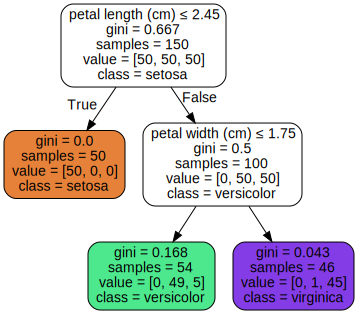

In [7]:
# print the decision tree using GraphViz
graph = print_tree(d_tree=tree_clf, f_names=iris.feature_names[2:], c_names=iris.target_names)
graph

In [9]:
# write the imge to a PNG file
with open('iris.png','wb') as f:
    f.write(graph.pipe(format='png'))

A node's `gini` attribute measures its impurity: a node is **pure** (`gini=0`) if all training instances it applies to belong to the same class. For example, the `depth-1` left node applies to only `Iris-Setosa` training instances, hence it is pure and its gini score is 0.<br>
Gini impurity is given by: 
<br> $${G}_i = 1 - \sum_{k=1}^{n} {{p_i}_k}^2 $$<br>
where ${p_i}_k$ is the ratio of class `k` instances among the training instances in the $i^{th}$ node.

Let's calculate the `gini score` of the `depth-2` left node.

In [10]:
1 - (49/54)**2 - (5/54)**2

0.1680384087791495

#### Estimating Class Probabilities
For  a classification tree, a given observation is predicted to be in the *most commonly occuring class* of training observations in the region to which it belongs. 

In [11]:
tree_clf.predict_proba([[5,1.5]]) # petal length: 5cm, petal width:1.5 cm

array([[0.        , 0.90740741, 0.09259259]])

In [12]:
tree_clf.predict([[5,1.5]])

array([1])

#### Other Impurity Measures
Another measure of node impurity is `entropy`. A node's entropy is `0` if it contains instances of only one class. 
The entropy of the $i^{th}$ node is given by:
$${H}_i = - \sum_{k=1}^{n} {p_i}_k log({p_i}_k) $$ where ${p_i}_k$ is the ratio of class `k` instances among the training instances in the $i^{th}$ node and ${p_i}_k\neq0$.

### Heart Disease Dataset

Let's do another example using the heart disease dataset, `Heart.csv`.<br>Read more about this dataset [here](https://archive.ics.uci.edu/ml/datasets/Heart+Disease).

In [13]:
heart = pd.read_csv('Heart.csv').drop('Unnamed: 0', axis=1).dropna()
heart.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [14]:
print(heart['ChestPain'].unique())
print(heart['Thal'].unique())
print(heart['AHD'].unique())

['typical' 'asymptomatic' 'nonanginal' 'nontypical']
['fixed' 'normal' 'reversable']
['No' 'Yes']


In [15]:
heart.shape

(297, 14)

In [16]:
heart = pd.get_dummies(heart, drop_first=True)
heart.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_normal,Thal_reversable,AHD_Yes
0,63,1,145,233,1,2,150,0,2.3,3,0.0,0,0,1,0,0,0
1,67,1,160,286,0,2,108,1,1.5,2,3.0,0,0,0,1,0,1
2,67,1,120,229,0,2,129,1,2.6,2,2.0,0,0,0,0,1,1
3,37,1,130,250,0,0,187,0,3.5,3,0.0,1,0,0,1,0,0
4,41,0,130,204,0,2,172,0,1.4,1,0.0,0,1,0,1,0,0


In [17]:
heart.shape

(297, 17)

In [18]:
# prepare data for decision tree classifier
X1 = heart.drop('AHD_Yes', axis=1) 
y1 = heart.AHD_Yes

X1.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_normal,Thal_reversable
0,63,1,145,233,1,2,150,0,2.3,3,0.0,0,0,1,0,0
1,67,1,160,286,0,2,108,1,1.5,2,3.0,0,0,0,1,0
2,67,1,120,229,0,2,129,1,2.6,2,2.0,0,0,0,0,1
3,37,1,130,250,0,0,187,0,3.5,3,0.0,1,0,0,1,0
4,41,0,130,204,0,2,172,0,1.4,1,0.0,0,1,0,1,0


In [19]:
#split to training and test dataset
X_train, X_val, y_train, y_val = train_test_split(X1, y1, train_size=0.5, random_state=23)
print(len(X_train))
print(len(X_val))

148
149


In [20]:
# documentation: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
clftree = DecisionTreeClassifier(max_depth=None, max_leaf_nodes=6, max_features=3, random_state=23)
clftree.fit(X_train,y_train)

DecisionTreeClassifier(max_features=3, max_leaf_nodes=6, random_state=23)

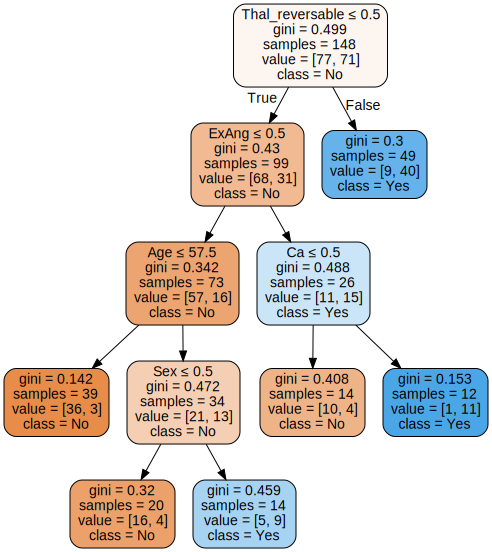

In [21]:
# plot the tree
graphClf = print_tree(d_tree=clftree, f_names=X1.columns, c_names=['No', 'Yes'])
graphClf

In [ ]:
# Training Set Accuracy
print("Training Set Classification Accuracy:", clftree.score(X_train,y_train))

# confusion matrix
print("Confusion Matrix:")
cm = pd.DataFrame(confusion_matrix(y_train, clftree.predict(X_train)), index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
display(cm)

# Classification Report
print("Classification Report:")
print(classification_report(y_train, clftree.predict(X_train)))

In [ ]:
# Validation Set Accuracy
print("Validation Set Classification Accuracy:", clftree.score(X_val,y_val))

# confusion matrix
print("Confusion Matrix:")
cm = pd.DataFrame(confusion_matrix(y_val, clftree.predict(X_val)), index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
display(cm)

# Classification Report
print("Classification Report:")
print(classification_report(y_val, clftree.predict(X_val)))

### Regression Trees
Decision Trees are also capable of performing regression tasks. <br>We can use Scikit-Learn's `DecisionTreeRegressor` to produce regression trees.

### Hitters Dataset
We use the **Hitters.csv** for our discussion on Regression Trees.

In [ ]:
hitters = pd.read_csv('Hitters.csv').drop('Unnamed: 0', axis=1).dropna()
hitters.head()

In [ ]:
print(hitters.League.unique())
print(hitters.Division.unique())
print(hitters.NewLeague.unique())

In [ ]:
hitters = pd.get_dummies(hitters, drop_first=True)
hitters.head()

Let's predict a baseball player's salary based on `Years` (the number of years that he has played in the major leagues) and `Hits` (the number of hits that he made in the previous year).

In [ ]:
X2 = hitters[['Years', 'Hits']].to_numpy()
y2 = np.log(hitters.Salary.to_numpy()) # log transformation

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(11,4))

ax1.hist(hitters.Salary.to_numpy())
ax1.set_xlabel('Salary')
ax1.set_ylabel('Count')

ax2.hist(y2)
ax2.set_xlabel('Log(Salary)')
ax2.set_ylabel('Count');

In [ ]:
#documentation: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
regtree = DecisionTreeRegressor(max_leaf_nodes=3, random_state=23)
regtree.fit(X2, y2)

In [ ]:
graphRegTree = print_tree(d_tree=regtree, f_names=['Years', 'Hits'])
graphRegTree

In [ ]:
# we can plot the decision tree regions on the data
hitters.plot('Years', 'Hits', kind='scatter', color='orange', figsize=(7,6))
plt.xlim(0,25)
plt.ylim(ymin=-5)
plt.xticks([1, 4.5, 24])
plt.yticks([1, 117.5, 238])
plt.vlines(4.5, ymin=-5, ymax=250)
plt.hlines(117.5, xmin=4.5, xmax=25)
plt.annotate('R1', xy=(2,117.5), fontsize='xx-large')
plt.annotate('R2', xy=(11,60), fontsize='xx-large')
plt.annotate('R3', xy=(11,170), fontsize='xx-large');

In [ ]:
hitters_X = hitters.drop('Salary', axis=1) 
hitters_X.head()

In [ ]:
# Training Test Split
X2 = hitters_X.to_numpy()
y2 = np.log(hitters.Salary.to_numpy())
X2_train, X2_val, y2_train, y2_val = train_test_split(X2, y2, train_size=0.5, random_state=23)

In [ ]:
regtree2 = DecisionTreeRegressor(max_depth=3, random_state=23)
regtree2.fit(X2_train, y2_train)
pred = regtree2.predict(X2_val)

In [ ]:
graph2 = print_tree(d_tree=regtree2, f_names=hitters_X.columns)
graph2

In [ ]:
# Plotting predicted vs. actual
plt.scatter(pred, y2_val, label='Salary')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y2_val');

In [ ]:
mean_squared_error(y2_val, pred)

### Bagging and Random Forest

The decision trees we discussed suffer from high variance. <br>

**Bagging**: Bootstrap aggregation, or bagging, is a general-purpose procedure for reducing the variance of a statistical learning method.

Averaging a set of observations reduces variance. Hence a natural way to reduce the variance and hence increase the prediction accuracy of a statistical learning method is to take many training sets from the population, build a separate prediction model using each training set, and average the resulting predictions.

In the classification situation, there are a few possible approaches, but the simplest is as follows. For a given test observation, we can record the class predicted by each of the trees, and take a majority vote: the overall prediction is the most commonly occurring majority vote class among the predictions.

**Random Forest**: As in bagging, we build a number of decision trees on bootstrapped training samples. But when building these decision trees, each time a split in a tree is considered, only a random sample of predictors is chosen as split candidates from the full set of predictors.

In [ ]:
#checking the number of features available in the dataset (which is 19)
hitters_X.shape

In [ ]:
# Bagging: that is, we use all features in the dataset
#documentation: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
regtreeBag = RandomForestRegressor(max_features=19, random_state=23)
regtreeBag.fit(X2_train, y2_train)

In [ ]:
predBag = regtreeBag.predict(X2_val)
plt.scatter(predBag, y2_val, label='Salary')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('predBag')
plt.ylabel('y2_val');

In [ ]:
mean_squared_error(y2_val, predBag)

In [ ]:
# Random forests: using 6 features
regtreeRF = RandomForestRegressor(max_features=6, random_state=23)
regtreeRF.fit(X2_train, y2_train)

In [ ]:
predRF = regtreeRF.predict(X2_val)
plt.scatter(predRF, y2_val)
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('predRF')
plt.ylabel('y2_val')

In [ ]:
mean_squared_error(y2_val, predRF)

In [ ]:
Importance = pd.DataFrame({'Importance':regtreeRF.feature_importances_*100}, index=hitters_X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', width = 0.8)
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

### Boosting
A key diﬀerence between boosting and random forests: in boosting, the growth of a particular tree takes into account the other trees that have already been grown. This often results in using smaller trees, which aids interpretability of the model.

In [ ]:
# documentation: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
regtreeBoost = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, random_state=23)
regtreeBoost.fit(X2_train, y2_train)

In [ ]:
predBoost = regtreeBoost.predict(X2_val)
plt.scatter(predBoost, y2_val)
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('predBoost')
plt.ylabel('y2_val')

In [ ]:
mean_squared_error(y2_val, predBoost)

In [ ]:
feature_importance = regtreeBoost.feature_importances_*100
rel_imp = pd.Series(feature_importance, index=hitters_X.columns).sort_values(inplace=False)
print(rel_imp)
rel_imp.T.plot(kind='barh', color='r', width=0.8)
plt.xlabel('Variable Importance')
plt.gca().legend_ = None